## Detecção de Fraudes em Transações Bancárias

---



#Importando Bibliotecas 

# Objetivos

* Selecionar as variáveis ​​mais relevantes para a previsão da coluna que verifica se a transação é fraudulenta ou não.

* Projetar e construir diferentes modelos usando a base de dados, o que permite a referida previsão.

* Avaliar a validade de cada modelo e escolha aquele que melhor se aplica.



In [ ]:
# analises de dados
import pandas as pd
import numpy as np
import random as rnd
from pandas import read_csv

# visualização
import seaborn as sns
from scipy.stats import norm, skew
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier


from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,
                             GradientBoostingClassifier, ExtraTreesClassifier,
                             VotingClassifier)

from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict,
                                     StratifiedKFold, learning_curve)


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import RFE


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


In [ ]:
train_identity = pd.read_csv('/train_identity.csv')
train_transaction = pd.read_csv('/train_transaction.csv')

In [ ]:
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [ ]:
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_transaction.shape


(193540, 394)

394 colunas e 590.540 observações.

In [ ]:
train_transaction.columns.values # quantidade de colunas

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

In [ ]:
train_identity.shape

(144233, 41)

In [ ]:

train_identity.columns.values

array(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05',
       'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12',
       'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19',
       'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26',
       'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33',
       'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType',
       'DeviceInfo'], dtype=object)

o Arquivo train identity tem 41 colunas e 144.233 observações



In [ ]:
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')

In [ ]:
#Para economizar memória, deletar a base de dados _train transaction_ y _train identity_
del train_identity, train_transaction

In [ ]:
train.shape

(193540, 434)

In [ ]:
train.columns.values 

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain',
       'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8',
       'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4',
       'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14',
       'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1',
       'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29',
       'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38',
       'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47',
       'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56',
       'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65',
       'V66', 'V6

In [ ]:
#Explorando os dados vazios para descartar
train.isnull().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
                   ...  
id_36             126194
id_37             126194
id_38             126194
DeviceType        126318
DeviceInfo        133932
Length: 434, dtype: int64

In [ ]:
total = train.isnull().sum().sort_values(ascending = False) #somando valores nulos por coluna
porcentaje = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending = False) #y % del total
missing_train_data  = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje']) #df para explorar
missing_train_data.head(50)

,Total,Porcentaje
id_24,191207,98.794564
id_25,191040,98.708277
id_21,191032,98.704144
id_07,191031,98.703627
id_08,191031,98.703627
id_26,191029,98.702594
id_27,191028,98.702077
id_23,191028,98.702077
id_22,191028,98.702077
D7,181166,93.606490


In [ ]:
missing_train_data.head(235)

,Total,Porcentaje
id_24,191207,98.794564
id_25,191040,98.708277
id_21,191032,98.704144
id_07,191031,98.703627
id_08,191031,98.703627
...,...,...
M4,102439,52.929110
D3,102420,52.919293
M6,77001,39.785574
V38,76408,39.479177


* A exploração inicial sugere que certas colunas contêm uma grande quantidade de dados vazios, que podem representar quase todos os dados, ou seja, 99% do total para certas variáveis ​​de identidade.

* No total, 232 colunas contêm mais de 40% das observações vazias; as 202 colunas restantes contêm mais de 70% dos dados carregados, ou seja, como não nulos.

* Como primeiro passo, removo as 232 colunas com mais de 40% de valores nulos

In [ ]:
#criando um novo df com colunas de 70% dos dados não nulos
Train_new = train.drop(train.loc[:,list((100*(train.isnull().sum()/len(train.index))>30))].columns, 1)
total1 = Train_new.isnull().sum().sort_values(ascending = False) #somando valores nulos por coluna
porcentaje1 = (Train_new.isnull().sum()/Train_new.isnull().count()*100).sort_values(ascending = False) #y % del total
missing_train_data1  = pd.concat([total1, porcentaje1], axis=1, keys=['Total', 'Porcentaje']) #df para explorar
missing_train_data1.head(50)

<ipython-input-16-a0cdfa1d8d3b>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Train_new = train.drop(train.loc[:,list((100*(train.isnull().sum()/len(train.index))>30))].columns, 1)


,Total,Porcentaje
V90,49724,25.691847
V84,49724,25.691847
V75,49724,25.691847
V76,49724,25.691847
V77,49724,25.691847
V78,49724,25.691847
V80,49724,25.691847
V81,49724,25.691847
V82,49724,25.691847
V83,49724,25.691847


In [ ]:
Train_new.shape

(193540, 182)

In [ ]:
Train_new.columns.values

array(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6',
       'addr1', 'addr2', 'P_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5',
       'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1',
       'D10', 'D15', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V53', 'V54',
       'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63',
       'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72',
       'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81',
       'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90',
       'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99',
       'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107',
       'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115',
       'V1

Descartar dados nulos, incluindo valores vazios e NAs, e assim reduzir o tamanho do dataframe

In [ ]:
#criando um novo dataset sem valores nulos
Train_new2 = Train_new.dropna()
Train_new2.shape

(92296, 182)

In [ ]:
total1 = Train_new2.isna().sum().sort_values(ascending = False) 
porcentaje1 = (Train_new2.isna().sum()/Train_new2.isna().count()*100).sort_values(ascending = False) #y % del total
missing_train_data1  = pd.concat([total1, porcentaje1], axis=1, keys=['Total', 'Porcentaje']) #df para explorar
missing_train_data1.head(50)

,Total,Porcentaje
TransactionID,0,0.0
V113,0,0.0
V115,0,0.0
V116,0,0.0
V117,0,0.0
V118,0,0.0
V119,0,0.0
V120,0,0.0
V121,0,0.0
V122,0,0.0


## Exploração Data Analysis

Nesta seção iremos explorar a base de dados com mais detalhes, em particular o comportamento da variável alvo _Is Fraud_ e sua relação com as demais colunas.

Devido ao tamanho da base de dados, deve-se extrair uma amostra de 15% (50.000 dados) do total para facilitar a exploração dos dados.

In [ ]:
# Extraindo amostra
Train_sample = Train_new2.sample(frac =.1524, random_state = 2)
Train_sample.shape

(14066, 182)

In [ ]:
Train_sample.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321
155234,3142234,0,3204828,422.5,W,18080,111.0,150.0,mastercard,219.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85726,3072726,0,1811047,150.0,H,11233,321.0,150.0,visa,195.0,...,0.0,0.0,0.0,0.0,150.0,150.0,150.0,0.0,0.0,0.0
140101,3127101,0,2859356,49.0,W,2803,100.0,150.0,visa,226.0,...,93.5,93.5,93.5,93.5,0.0,49.0,49.0,0.0,0.0,0.0
90175,3077175,0,1885771,117.0,W,11738,401.0,150.0,visa,226.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19005,3006005,0,503861,200.0,W,9323,111.0,150.0,visa,226.0,...,700.0,0.0,926.0,0.0,1600.0,21517.0,17700.0,0.0,740.0,0.0


In [ ]:
print("A variavel objetivo _Is Fraud_ tem {0} observações e {1} sem valores únicos.".format(Train_sample['isFraud'].count(),Train_sample['isFraud'].nunique()))

A variavel objetivo _Is Fraud_ tem 14066 observações e 2 sem valores únicos.


In [ ]:
print(Train_sample['isFraud'].describe())

count    14066.000000
mean         0.021683
std          0.145653
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: isFraud, dtype: float64


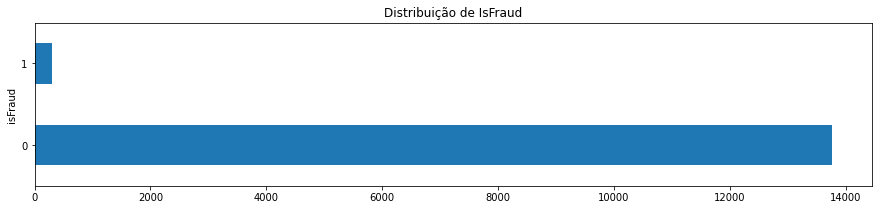

In [ ]:
Train_sample.groupby('isFraud') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribuição de IsFraud',
          figsize=(15, 3))
plt.show()

In [ ]:
print(Train_sample['isFraud'].value_counts())

0    13761
1      305
Name: isFraud, dtype: int64


* A variável objetiva assume valores 0 (sem fraude) e 1 (fraude).
Apenas 991 das observações são fraudes, ou seja, 2% do total.
* Em princípio, a pequena proporção de observações com fraude em relação às não fraudulentas poderia afetar a qualidade dos estimadores na modelagem, no sentido de que podem ocorrer vieses de estimação.

Agora será avaliada a relação com cada subconjunto de variáveis ​​explicativas. 

In [ ]:
#TransactionDT
print(Train_sample['TransactionDT'].describe())

count    1.406600e+04
mean     2.203434e+06
std      1.219554e+06
min      8.652200e+04
25%      1.120814e+06
50%      2.129896e+06
75%      3.256297e+06
max      4.358266e+06
Name: TransactionDT, dtype: float64


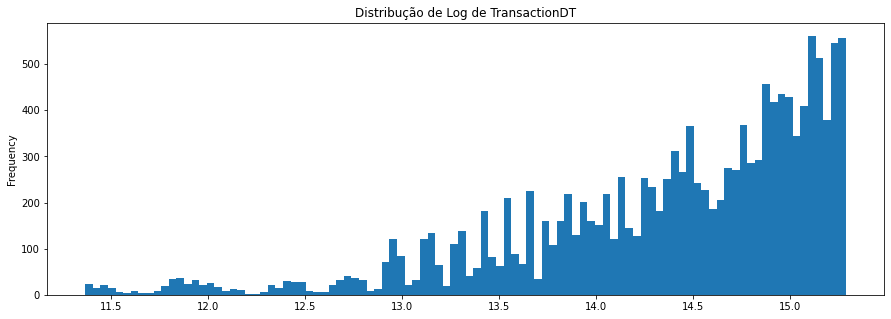

In [ ]:
#Histograma da coluna em log, para suavizar escala
Train_sample['TransactionDT'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribução de Log de TransactionDT')
plt.show()


* Variável numérica que mede o tempo desde a transação.
* É distribuído com inclinação positiva: os dados se concentram nos valores mais altos, ou seja, a moda é que o tempo decorrido desde a transação é o mais longo.

In [ ]:
#relação com coluna objetivo
Train_sample[['TransactionDT', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,TransactionDT
0,0,2.204020e+06
1,1,2.176986e+06


In [ ]:
print('A media de TransactionDT com IsFraud igual a 1 é: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['TransactionDT'].mean()))
print('A media de TransactionDT com IsFraud igual a 0 é: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['TransactionDT'].mean()))

A media de TransactionDT com IsFraud igual a 1 é: 2176986.4689
A media de TransactionDT com IsFraud igual a 0 é: 2204020.1814


* De maneira geral, pode-se dizer que as transações fraudulentas tendem a ocorrer com menos tempo após a coleta de dados.
* Porém, como a unidade de tempo é o segundo, não há grande diferença no tempo médio decorrido entre transações com fraude ou não.
* A priori, a observação sugere que esta coluna não terá alto nível explicativo no IsFraud.

In [ ]:
#TransactionAmt
print(Train_sample['TransactionAmt'].describe())

count    14066.000000
mean       154.218995
std        255.929518
min          1.251000
25%         49.000000
50%         80.950000
75%        155.620000
max       4220.390000
Name: TransactionAmt, dtype: float64


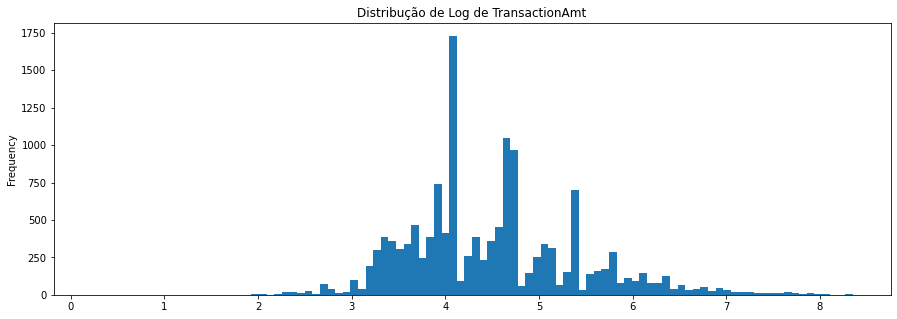

In [ ]:
#Histograma de coluna em log, para suavizar escala
Train_sample['TransactionAmt'] \
    .apply(np.log) \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribução de Log de TransactionAmt')
plt.show()

* Em média, o valor de uma transação gira em torno de USD 160; o valor mínimo é de USD 3.5, enquanto o máximo é de USD 4.843 
* O logaritmo da série mostra uma distribuição que se assemelha à normal

In [ ]:
Train_sample[['TransactionAmt', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,TransactionAmt
0,0,153.823759
1,1,172.051266


In [ ]:
print('A media de TransactionAmt com IsFraud igual a 1 é: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['TransactionAmt'].mean()))
print('A media de TransactionAmt com IsFraud igual a 0 é: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['TransactionAmt'].mean()))

A media de TransactionAmt com IsFraud igual a 1 é: 172.0513
A media de TransactionAmt com IsFraud igual a 0 é: 153.8238


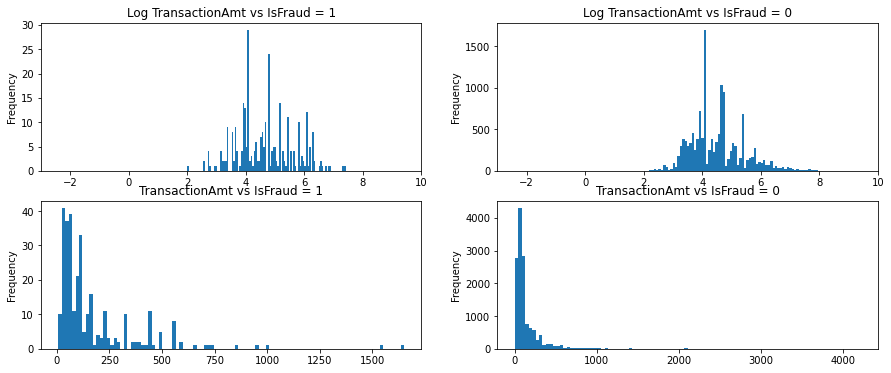

In [ ]:
#Histogramas de TransactionAmt vs. IsFraud
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 6))
Train_sample.loc[Train_sample['isFraud'] == 1] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log TransactionAmt vs IsFraud = 1',
          xlim=(-3, 10),
         ax= ax1)
Train_sample.loc[Train_sample['isFraud'] == 0] \
    ['TransactionAmt'].apply(np.log) \
    .plot(kind='hist',
          bins=100,
          title='Log TransactionAmt vs IsFraud = 0',
          xlim=(-3, 10),
         ax=ax2)
Train_sample.loc[Train_sample['isFraud'] == 1] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='TransactionAmt vs IsFraud = 1',
         ax= ax3)
Train_sample.loc[Train_sample['isFraud'] == 0] \
    ['TransactionAmt'] \
    .plot(kind='hist',
          bins=100,
          title='TransactionAmt vs IsFraud = 0',
         ax=ax4)
plt.show()

* As transações fraudulentas, em média, tendem a ser de valores mais elevados (cerca de 50%) do que as transações não fraudulentas, como seria de se esperar a priori.
* Esta coluna será relevante para prever se uma transação é fraudulenta.

In [ ]:
print(Train_sample['ProductCD'].value_counts())

W    13516
C      381
R      125
H       44
Name: ProductCD, dtype: int64


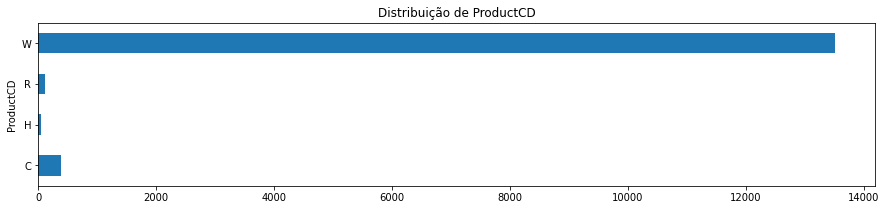

In [ ]:
Train_sample.groupby('ProductCD') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribuição de ProductCD',
          figsize=(15, 3))
plt.show()


* A varredura mostra que a variável ProductCD assume um único valor (W), o que é incomum.
* Deve ser contrastado com a distribuição da coluna no quadro de dados da população para verificar se não é um problema de amostragem.

In [ ]:
print(Train_new2['ProductCD'].value_counts())

W    88827
C     2346
R      777
H      346
Name: ProductCD, dtype: int64



* Na base de dados completo, a coluna também assume um valor exclusivo.
* Devido à não variabilidade, eliminar a coluna do dataframe, tanto a amostra quanto a população.

In [ ]:
#Eliminando a coluna _ProductCD_ da base de dados
Train_sample = Train_sample.drop(['ProductCD'], axis=1)
Train_new2 = Train_new2.drop(['ProductCD'], axis=1)

### Card1 - Card6
* Conjunto de colunas categóricas que denotam informações sobre o cartão de pagamento, como tipo, categoria, banco, país, entre outros

In [ ]:
#criando vetor nomeado de colunas para facilitar a exploração
card_cols = ["card1", "card2", "card3", "card4", "card5", "card6"]
Train_sample[card_cols].head(50)

,card1,card2,card3,card4,card5,card6
155234,18080,111.0,150.0,mastercard,219.0,credit
85726,11233,321.0,150.0,visa,195.0,debit
140101,2803,100.0,150.0,visa,226.0,debit
90175,11738,401.0,150.0,visa,226.0,debit
19005,9323,111.0,150.0,visa,226.0,debit
186919,6481,111.0,150.0,visa,226.0,debit
99052,16758,310.0,150.0,mastercard,224.0,debit
14590,6236,194.0,150.0,mastercard,117.0,debit
128802,2263,174.0,150.0,visa,226.0,debit
18861,8009,111.0,150.0,visa,226.0,credit


In [ ]:
Train_sample[card_cols].tail(50)

,card1,card2,card3,card4,card5,card6
71889,1724,583.0,150.0,visa,226.0,credit
161464,5195,555.0,150.0,visa,226.0,debit
20795,16883,111.0,150.0,visa,226.0,debit
161903,4030,174.0,150.0,visa,226.0,debit
22631,7919,194.0,150.0,mastercard,202.0,debit
86246,3762,555.0,150.0,visa,226.0,debit
52424,12577,268.0,150.0,visa,166.0,debit
21282,18018,452.0,150.0,mastercard,117.0,debit
193109,14410,276.0,150.0,visa,226.0,debit
73584,10082,555.0,150.0,visa,226.0,debit



* Card4 é categórico e indica o tipo de cartão utilizado na operação (visa, mastercard).
* Card6 é categórico e indica a categoria do cartão utilizado (débito, crédito).
* _Card1, Card2, Card3 e Card5, são números que indicam a categoria de classificação do cartão, como código do país, banco, idade. O significado não é revelado.

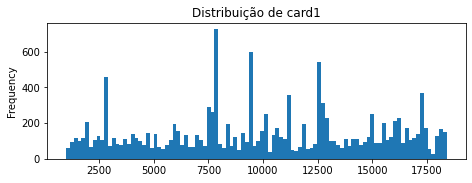

In [ ]:
#Distribuição de _Card1_
Train_sample['card1'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribuição de card1')
plt.show()

In [ ]:
#Distribuição de _Card1_ relativo a IsFraud
Train_sample[['card1', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,card1
0,0,9976.451929
1,1,9640.819672



* Não há distinção clara da classificação desta carta em relação à variável alvo.
* Este comportamento também se aplica a Card1, Card2 e Card5 (abaixo dos gráficos e tabelas).

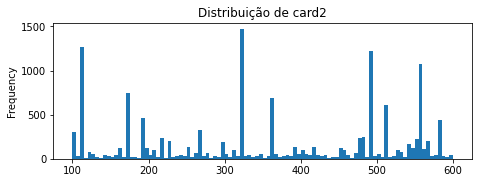

In [ ]:
#Distribuição de _Card2_
Train_sample['card2'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribuição de card2')
plt.show()

In [ ]:
#Distribuição de _Card2_ relativo a IsFraud
Train_sample[['card2', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,card2
0,0,355.925441
1,1,370.767213


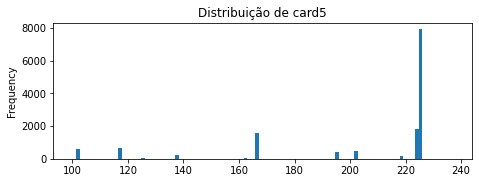

In [ ]:
#Distribuição de _Card5_
Train_sample['card5'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribuição de card5')
plt.show()

In [ ]:
#Distribuição de _Card5_ relativo a IsFraud
Train_sample[['card5', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,card5
0,0,204.576557
1,1,198.957377


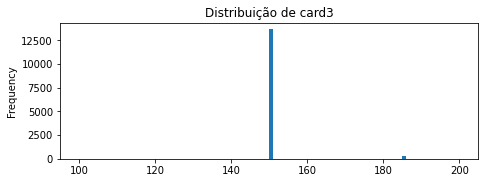

In [ ]:
#Distribuição de _Card3_
Train_sample['card3'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribuição de card3')
plt.show()


* A variável assume um único valor (150), que provavelmente se refere ao código do país do cartão (EUA).
* Avaliando a distribuição nos dados populacionais para contrastar.

In [ ]:
#Valores únicos de _Card3_ na bse populacional
print(Train_new2['card3'].value_counts())

150.0    89737
185.0     2008
143.0      218
144.0       51
106.0       43
146.0       40
117.0       32
147.0       20
119.0       16
162.0       13
102.0       10
131.0       10
134.0        8
194.0        7
148.0        6
210.0        6
203.0        5
213.0        5
188.0        5
197.0        5
109.0        5
100.0        4
149.0        3
118.0        3
133.0        3
200.0        3
195.0        2
141.0        2
142.0        2
135.0        2
191.0        2
166.0        2
189.0        2
227.0        1
129.0        1
170.0        1
204.0        1
182.0        1
153.0        1
206.0        1
190.0        1
217.0        1
138.0        1
111.0        1
222.0        1
220.0        1
223.0        1
208.0        1
229.0        1
Name: card3, dtype: int64



* Embora, se mostre vários valores exclusivos, eles serão insignificantes em termos de tamanho da amostra: a segunda categoria mais repetida inclui menos de 0,1% de todos os dados.
* Devido a isso, eliminardo a variável da base de dados, tanto amostral quanto populacional.

In [ ]:
#Eliminando a coluna _card3_ da base de dados
Train_sample = Train_sample.drop(['card3'], axis=1)
Train_new2 = Train_new2.drop(['card3'], axis=1)

In [ ]:
#Distribuição de variavel categórica _Card4_ y _Card6_ sobre os tipos de bandeiras de cartão
#_Card4_
print(Train_sample['card4'].value_counts())

visa                9598
mastercard          4419
discover              25
american express      24
Name: card4, dtype: int64


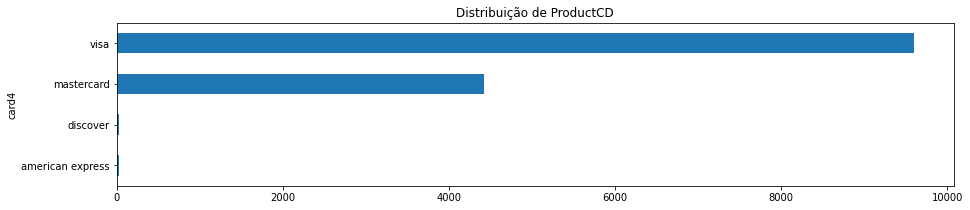

In [ ]:
Train_sample.groupby('card4') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribuição de ProductCD',
          figsize=(15, 3))
plt.show()

In [ ]:
#_Card6_
print(Train_sample['card6'].value_counts())

debit              11457
credit              2607
debit or credit        2
Name: card6, dtype: int64


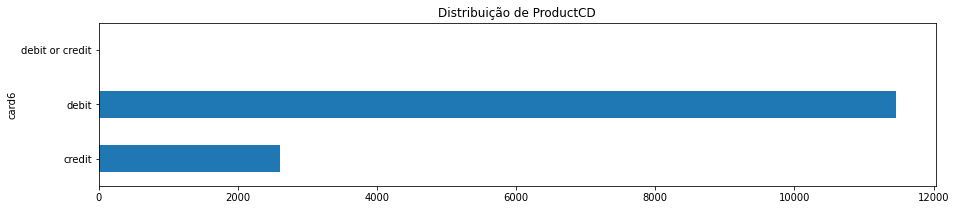

In [ ]:
Train_sample.groupby('card6') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribuição de ProductCD',
          figsize=(15, 3))
plt.show()

* Crédito é a segunda opção em termos de categoria
* As transações são feitas predominantemente por meio de cartões de débito Visa.
* Mastercard é a segunda opção de tipo de cartão
O crédito é uma segunda opção em termos de categoria

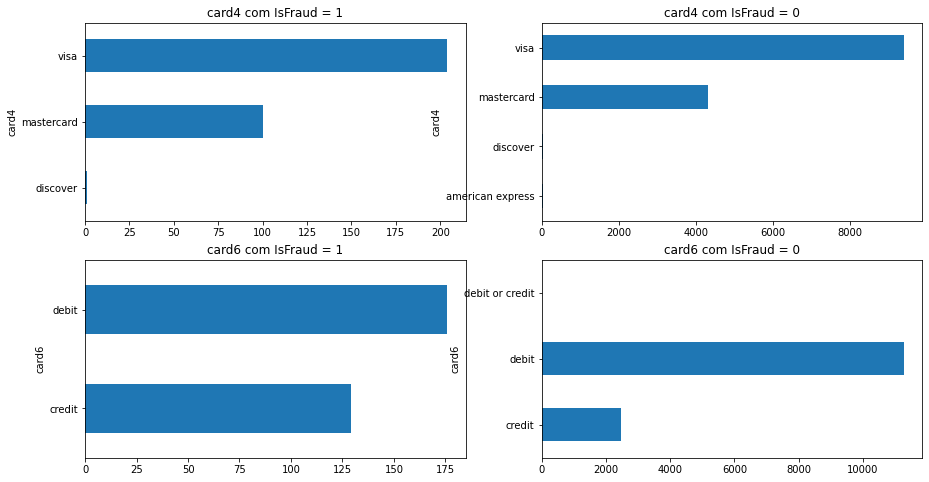

In [ ]:
Train_sample_fr1 = Train_sample.loc[Train_sample['isFraud'] == 1]
Train_sample_fr0 = Train_sample.loc[Train_sample['isFraud'] == 0]
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))
Train_sample_fr1.groupby('card4')['card4'].count().plot(kind='barh', ax=ax1, title='card4 com IsFraud = 1')
Train_sample_fr0.groupby('card4')['card4'].count().plot(kind='barh', ax=ax2, title='card4 com IsFraud = 0')
Train_sample_fr1.groupby('card6')['card6'].count().plot(kind='barh', ax=ax3, title='card6 com IsFraud = 1')
Train_sample_fr0.groupby('card6')['card6'].count().plot(kind='barh', ax=ax4, title='card6 com IsFraud = 0')
plt.show()


* Em termos de tipo de cartão, não existe uma grande distinção entre operações fraudulentas e não fraudulentas.
* Isso também vale para a categoria, embora, além disso, os cartões de crédito tendam a ter um peso relativo maior nas transações fraudulentas.


In [ ]:
#Card_4
Train_sample['visa'] = np.where(Train_sample['card4'] == 'visa', 1, 0)
print(Train_sample['visa'].value_counts())
Train_sample['mastercard'] = np.where(Train_sample['card4'] == 'mastercard', 1, 0)
print(Train_sample['mastercard'].value_counts())
Train_new2['visa'] = np.where(Train_new2['card4'] == 'visa', 1, 0)
Train_new2['mastercard'] = np.where(Train_new2['card4'] == 'mastercard', 1, 0)

#Card_6
Train_sample['debit'] = np.where(Train_sample['card6'] == 'debit', 1, 0)
print(Train_sample['debit'].value_counts())
Train_sample['credit'] = np.where(Train_sample['card6'] == 'credit', 1, 0)
print(Train_sample['credit'].value_counts())
Train_new2['debit'] = np.where(Train_new2['card6'] == 'debit', 1, 0)
Train_new2['credit'] = np.where(Train_new2['card6'] == 'credit', 1, 0)

#Elimando ambas as colunas dos dataframes da amostra e população
Train_sample = Train_sample.drop(['card4'], axis=1)
Train_new2 = Train_new2.drop(['card4'], axis=1)
Train_sample = Train_sample.drop(['card6'], axis=1)
Train_new2 = Train_new2.drop(['card6'], axis=1)


1    9598
0    4468
Name: visa, dtype: int64
0    9647
1    4419
Name: mastercard, dtype: int64
1    11457
0     2609
Name: debit, dtype: int64
0    11459
1     2607
Name: credit, dtype: int64


### Addr 01-02 
* Variáveis ​​que indicam o endereço do comprador e do vendedor. Nenhuma informação adicional é divulgada.

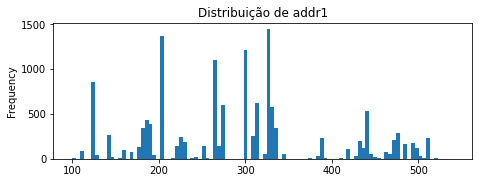

In [ ]:
#Distribuição de _Addr1_
Train_sample['addr1'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribuição de addr1')
plt.show()

In [ ]:
#Distribuição de _Addr1_ relativo a IsFraud
Train_sample[['addr1', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,addr1
0,0,290.508539
1,1,293.760656


* A coluna Addr1 é distribuída de forma relativamente uniforme nos dados.
* Nenhuma distinção significativa é observada a priori nesta coluna sobre se há fraude ou não.

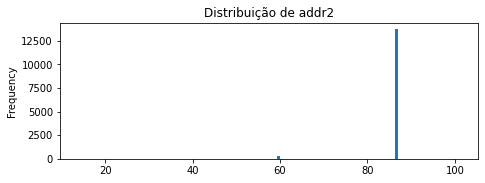

In [ ]:
#Distribuição de _Addr2_
Train_sample['addr2'] \
    .plot(kind='hist',
          bins=100,
          figsize=(7.5, 2.5),
          title='Distribuição de addr2')
plt.show()

* A coluna addr2 assume um valor exclusivo na amostra.
* Agora avaliar sua distribuição nos dados populacionais.

In [ ]:
#Valores exclusivos de _addr2_ na base populacional
print(Train_new2['addr2'].value_counts())

87.0     89988
60.0      2044
96.0        52
31.0        38
16.0        33
32.0        30
26.0        20
65.0        13
19.0        10
59.0        10
13.0         7
71.0         6
102.0        6
88.0         5
21.0         5
72.0         5
101.0        3
29.0         2
24.0         2
66.0         2
69.0         2
34.0         2
78.0         1
22.0         1
98.0         1
25.0         1
30.0         1
43.0         1
15.0         1
14.0         1
83.0         1
27.0         1
73.0         1
Name: addr2, dtype: int64


In [ ]:
#Eliminando a coluna _addr2_ da base de dados
Train_sample = Train_sample.drop(['addr2'], axis=1)
Train_new2 = Train_new2.drop(['addr2'], axis=1)

### _Pemaildomain_
* O domínio de e-mail do comprador. Variável categórica.

In [ ]:
print(Train_sample['P_emaildomain'].value_counts())

gmail.com          6492
yahoo.com          3529
aol.com             910
hotmail.com         838
anonymous.com       778
comcast.net         219
icloud.com          194
att.net             125
msn.com             117
outlook.com         117
live.com             90
sbcglobal.net        86
verizon.net          84
ymail.com            79
bellsouth.net        61
me.com               42
charter.net          40
cox.net              31
rocketmail.com       27
optonline.net        24
roadrunner.com       17
earthlink.net        15
yahoo.com.mx         13
windstream.net       12
mail.com             12
juno.com             12
netzero.com           9
sc.rr.com             9
live.com.mx           9
aim.com               8
gmail                 8
frontiernet.net       7
q.com                 6
mac.com               6
centurylink.net       6
frontier.com          5
cfl.rr.com            5
outlook.es            4
netzero.net           4
twc.com               4
yahoo.es              3
cableone.net    

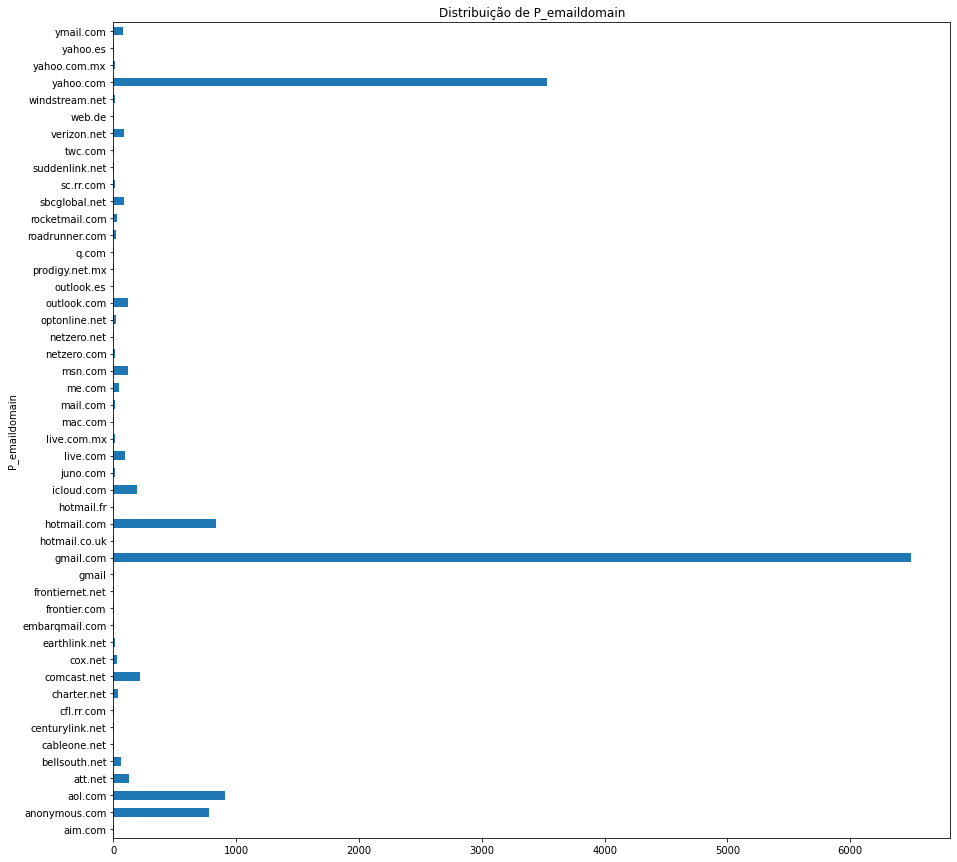

In [ ]:
Train_sample.groupby('P_emaildomain') \
    .count()['TransactionID'] \
    .plot(kind='barh',
          title='Distribuição de P_emaildomain',
          figsize=(15, 15))
plt.show()

In [ ]:
#Agora avaliamos a relação destes com a variável alvo _IsFraud_
#fraude
Train_sample_fr1 = Train_sample.loc[Train_sample['isFraud'] == 1]
print(Train_sample_fr1['P_emaildomain'].value_counts())

gmail.com        167
yahoo.com         69
hotmail.com       29
aol.com           10
live.com           6
mail.com           5
anonymous.com      4
outlook.com        3
icloud.com         2
comcast.net        2
me.com             2
att.net            2
msn.com            1
cableone.net       1
gmail              1
bellsouth.net      1
Name: P_emaildomain, dtype: int64


In [ ]:
#sem fraude
Train_sample_fr0 = Train_sample.loc[Train_sample['isFraud'] == 0]
print(Train_sample_fr0['P_emaildomain'].value_counts())

gmail.com          6325
yahoo.com          3460
aol.com             900
hotmail.com         809
anonymous.com       774
comcast.net         217
icloud.com          192
att.net             123
msn.com             116
outlook.com         114
sbcglobal.net        86
live.com             84
verizon.net          84
ymail.com            79
bellsouth.net        60
me.com               40
charter.net          40
cox.net              31
rocketmail.com       27
optonline.net        24
roadrunner.com       17
earthlink.net        15
yahoo.com.mx         13
windstream.net       12
juno.com             12
netzero.com           9
sc.rr.com             9
live.com.mx           9
aim.com               8
mail.com              7
gmail                 7
frontiernet.net       7
q.com                 6
mac.com               6
centurylink.net       6
frontier.com          5
cfl.rr.com            5
outlook.es            4
netzero.net           4
twc.com               4
yahoo.es              3
embarqmail.com  

* Para todas as transações, gmail.com é o domínio de e-mail do comprador mais comum, seguido por yahoo.com e aol.com
* Não é observada distinção entre o tipo de transação, portanto retirarei a coluna tanto da amostra quanto da população

In [ ]:
#Removendo a coluna _P_emaildomain_ da bse de dados
Train_sample = Train_sample.drop(['P_emaildomain'], axis=1)
Train_new2 = Train_new2.drop(['P_emaildomain'], axis=1)

### _C 01-14_ 
* Colunas ocultas e criptografadas.
* Referem-se a variáveis ​​de contagem, como número de endereços associados ao cartão, números de telefone, endereços de e-mail, entre outros.


In [ ]:
#Criando um dataframe com o conjunto de colunas _C_ para exploração
c_cols = [c for c in Train_sample if c[0] == 'C']
c_df = Train_sample[c_cols]
c_df.head(50)
c_df.shape

(14066, 14)

* Devido à pouca informação disponível das 14 colunas de contagem C, uma análise de componentes principais e extraio novas colunas que sintetizam as informações.

shape of X_pca (14066, 14)
[7.30425858e-01 2.46446181e-01 1.31823316e-02 6.13668355e-03
 2.06166500e-03 8.01721782e-04 4.17200343e-04 2.90240843e-04
 9.62753417e-05 8.12568143e-05 3.84053362e-05 1.26788868e-05
 9.50127485e-06 8.27466860e-38]
Soma: 0.9768720391853171


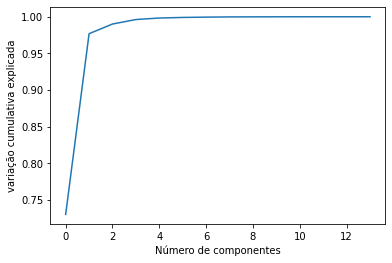

In [ ]:

scaler=StandardScaler()
scaler.fit(c_df) # calcula a média e o padrão para cada dimensão
X_scaled=scaler.transform(c_df)# transforma os dados em sua nova escala
#2) Aplicando PCA
pca=PCA(n_components=14)
pca.fit(X_scaled) # encontra os principais componentes
X_pca=pca.transform(X_scaled) 

print("shape of X_pca", X_pca.shape)

#3) Verificando a variabilidade do PCA
expl = pca.explained_variance_ratio_
print(expl)
print('Soma:',sum(expl[0:2]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('variação cumulativa explicada')
plt.show()

* A análise de componentes principais permite explicar 97% da variabilidade dos dados com apenas 2 novas colunas (ou seja, componentes).
* Passo a incluir esses dois componentes no banco de dados _Train sample_ e elimino as colunas _C 01-14_.


In [ ]:
#Incluindo os dois novos componentes nas colunas _C PCA1_ e _C PCA2_
Train_sample['C_PCA1'] = X_pca[:,0]
Train_sample['C_PCA2'] = X_pca[:,1]

#Removendo colunas C
Train_sample = Train_sample.drop([c for c in c_cols], axis=1)

Train_sample.shape

(14066, 168)

shape of X_pca (92296, 14)
[7.04632027e-01 2.69937144e-01 1.39050518e-02 6.70878026e-03
 2.07347989e-03 1.12962307e-03 7.02510616e-04 4.79642741e-04
 1.80789504e-04 1.25829508e-04 7.54492280e-05 3.01160303e-05
 1.95571878e-05 1.19562427e-35]
Soma: 0.9745691701700883


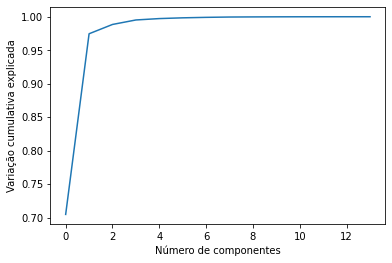

In [ ]:
#Replicando passos anteriores na base populacional

#PCA nas colunas _C 01-14_ em df _Train_new2_

c_df = Train_new2[c_cols]

scalerp=StandardScaler()
scalerp.fit(c_df) 
X_scaled=scalerp.transform(c_df)

#2) Aplicando PCA
pca=PCA(n_components=14)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 

print("shape of X_pca", X_pca.shape)


expl = pca.explained_variance_ratio_
print(expl)
print('Soma:',sum(expl[0:2]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variação cumulativa explicada')
plt.show()

In [ ]:

Train_new2['C_PCA1'] = X_pca[:,0]
Train_new2['C_PCA2'] = X_pca[:,1]


Train_new2 = Train_new2.drop([c for c in c_cols], axis=1)

Train_new2.shape

(92296, 168)

### _V 01-339_
* Conjunto de 169 variáveis de transação, como classificação, contagem, entre outras.
* São numéricos, porém seu significado foi ocultado.
* Prossigo para replicar as etapas da análise de componentes principais, bem como para as variáveis ​​_C_

In [ ]:
#Criando um dataframe com o conjunto de colunas _V_ para exploração
v_cols = [v for v in Train_sample if v[0] == 'V']
v_df = Train_sample[v_cols]
v_df.head(50)
v_df.shape

(14066, 151)

shape of X_pca (14066, 20)
[0.17379337 0.11906633 0.05334764 0.05104261 0.04195003 0.03795067
 0.03383993 0.03022488 0.02609264 0.0236795  0.02233002 0.02168351
 0.02075818 0.01986726 0.01773592 0.01679885 0.01573044 0.01435891
 0.01374211 0.01274496]
Soma: 0.7667377753135989


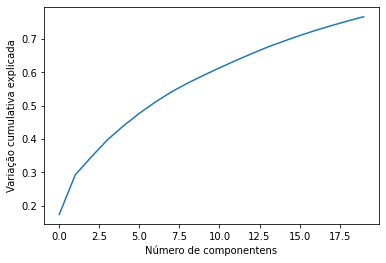

In [ ]:

scaler=StandardScaler()
scaler.fit(v_df) 
X_scaled=scaler.transform(v_df)

#2) Aplicando PCA
pca=PCA(n_components=20)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled) 

print("shape of X_pca", X_pca.shape)


expl = pca.explained_variance_ratio_
print(expl)
print('Soma:',sum(expl[0:20]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentens')
plt.ylabel('Variação cumulativa explicada')
plt.show()

* A análise de componentes principais permite explicar 74% da variabilidade dos dados com 20 novas colunas (ou seja, componentes).
* Continuo a incluir esses vinte componentes na base de dados _Train sample_ e descarto as colunas _V 01-33_.


In [ ]:
#Incluindo os 20 novos componentes nas colunas _V PCA1_ a _V PCA20_ em df _Train_new2_
Train_sample['V_PCA1'] = X_pca[:,0]
Train_sample['V_PCA2'] = X_pca[:,1]
Train_sample['V_PCA3'] = X_pca[:,2]
Train_sample['V_PCA4'] = X_pca[:,3]
Train_sample['V_PCA5'] = X_pca[:,4]
Train_sample['V_PCA6'] = X_pca[:,5]
Train_sample['V_PCA7'] = X_pca[:,6]
Train_sample['V_PCA8'] = X_pca[:,7]
Train_sample['V_PCA9'] = X_pca[:,8]
Train_sample['V_PCA10'] = X_pca[:,9]
Train_sample['V_PCA11'] = X_pca[:,10]
Train_sample['V_PCA12'] = X_pca[:,11]
Train_sample['V_PCA13'] = X_pca[:,12]
Train_sample['V_PCA14'] = X_pca[:,13]
Train_sample['V_PCA15'] = X_pca[:,14]
Train_sample['V_PCA16'] = X_pca[:,15]
Train_sample['V_PCA17'] = X_pca[:,16]
Train_sample['V_PCA18'] = X_pca[:,17]
Train_sample['V_PCA19'] = X_pca[:,18]
Train_sample['V_PCA20'] = X_pca[:,19]

#Removendo as colunas V
Train_sample = Train_sample.drop([v for v in v_cols], axis=1)

Train_sample.shape

(14066, 37)

shape of X_pca (92296, 20)
[0.17648918 0.1184084  0.05615159 0.05390396 0.04127357 0.03711403
 0.03400567 0.03033469 0.02618811 0.02356741 0.02190419 0.02081189
 0.02025619 0.01908766 0.01728529 0.01678887 0.01635539 0.01425519
 0.01307501 0.01263095]
suma: 0.7698872613525507


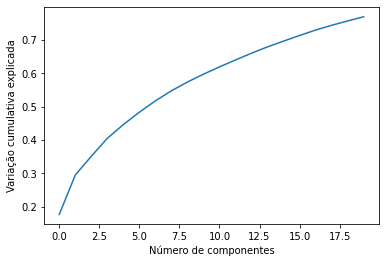

In [ ]:


v_df = Train_new2[v_cols]

#1) Padronizar os dados
scalerp=StandardScaler()
scalerp.fit(v_df) 
X_scaled=scalerp.transform(v_df)

#2) Aplicando PCA
pca=PCA(n_components=20)
pca.fit(X_scaled) 
X_pca=pca.transform(X_scaled) 

print("shape of X_pca", X_pca.shape)


expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:20]))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Variação cumulativa explicada')
plt.show()

In [ ]:
#Incluindo os 20 novos componentes nas colunas _V PCA1_ a _V PCA20_ em df _Train_new2_
Train_new2['V_PCA1'] = X_pca[:,0]
Train_new2['V_PCA2'] = X_pca[:,1]
Train_new2['V_PCA3'] = X_pca[:,2]
Train_new2['V_PCA4'] = X_pca[:,3]
Train_new2['V_PCA5'] = X_pca[:,4]
Train_new2['V_PCA6'] = X_pca[:,5]
Train_new2['V_PCA7'] = X_pca[:,6]
Train_new2['V_PCA8'] = X_pca[:,7]
Train_new2['V_PCA9'] = X_pca[:,8]
Train_new2['V_PCA10'] = X_pca[:,9]
Train_new2['V_PCA11'] = X_pca[:,10]
Train_new2['V_PCA12'] = X_pca[:,11]
Train_new2['V_PCA13'] = X_pca[:,12]
Train_new2['V_PCA14'] = X_pca[:,13]
Train_new2['V_PCA15'] = X_pca[:,14]
Train_new2['V_PCA16'] = X_pca[:,15]
Train_new2['V_PCA17'] = X_pca[:,16]
Train_new2['V_PCA18'] = X_pca[:,17]
Train_new2['V_PCA19'] = X_pca[:,18]
Train_new2['V_PCA20'] = X_pca[:,19]


Train_new2 = Train_new2.drop([v for v in v_cols], axis=1)

Train_new2.shape


(92296, 37)

### _D1_ , _D4_ , _D10_ , _D15_
* Variáveis ​​numéricas que denotam tempo, como tempo decorrido desde a última transação, entre outras.
* Seu significado real está oculto.
* Vou explorar individualmente seu comportamento, bem como sua relação com a variável de destino _IsFraud_

In [ ]:
#D1
#TransactionDT
print(Train_sample['D1'].describe())

count    14066.000000
mean       106.579269
std        153.186631
min          0.000000
25%          0.000000
50%         21.000000
75%        169.000000
max        608.000000
Name: D1, dtype: float64


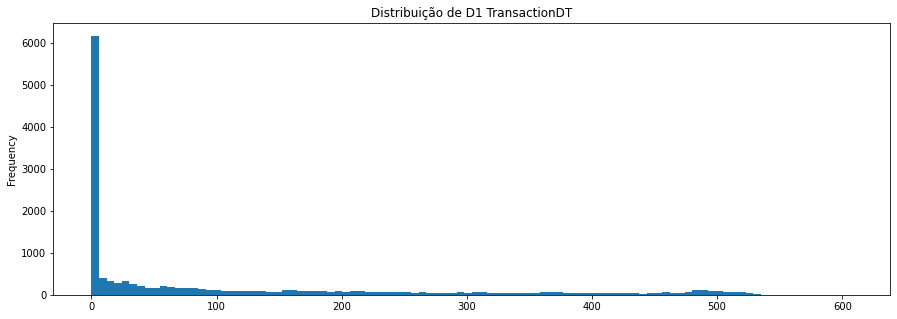

In [ ]:
#Histograma da coluna D1
Train_sample['D1'] \
    .plot(kind='hist',
          bins=100,
          figsize=(15, 5),
          title='Distribuição de D1 TransactionDT')
plt.show()

In [ ]:

Train_sample[['D1', 'isFraud']].groupby(['isFraud'], as_index=False).mean()

,isFraud,D1
0,0,107.596614
1,1,60.678689


In [ ]:
print('A media de D1 com IsFraud igual a 1 é: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 1]['D1'].mean()))
print('A media de D1 com IsFraud igual a 0 é: {:.4f}'.format(Train_sample.loc[Train_sample['isFraud'] == 0]['D1'].mean()))

A media de D1 com IsFraud igual a 1 é: 60.6787
A media de D1 com IsFraud igual a 0 é: 107.5966


* Observa-se nestas colunas uma diferença relevante entre transações fraudulentas e não fraudulentas: para observações com fraude, D1 tende a ser quase a metade do que para não fraude.

### Matriz de correlação

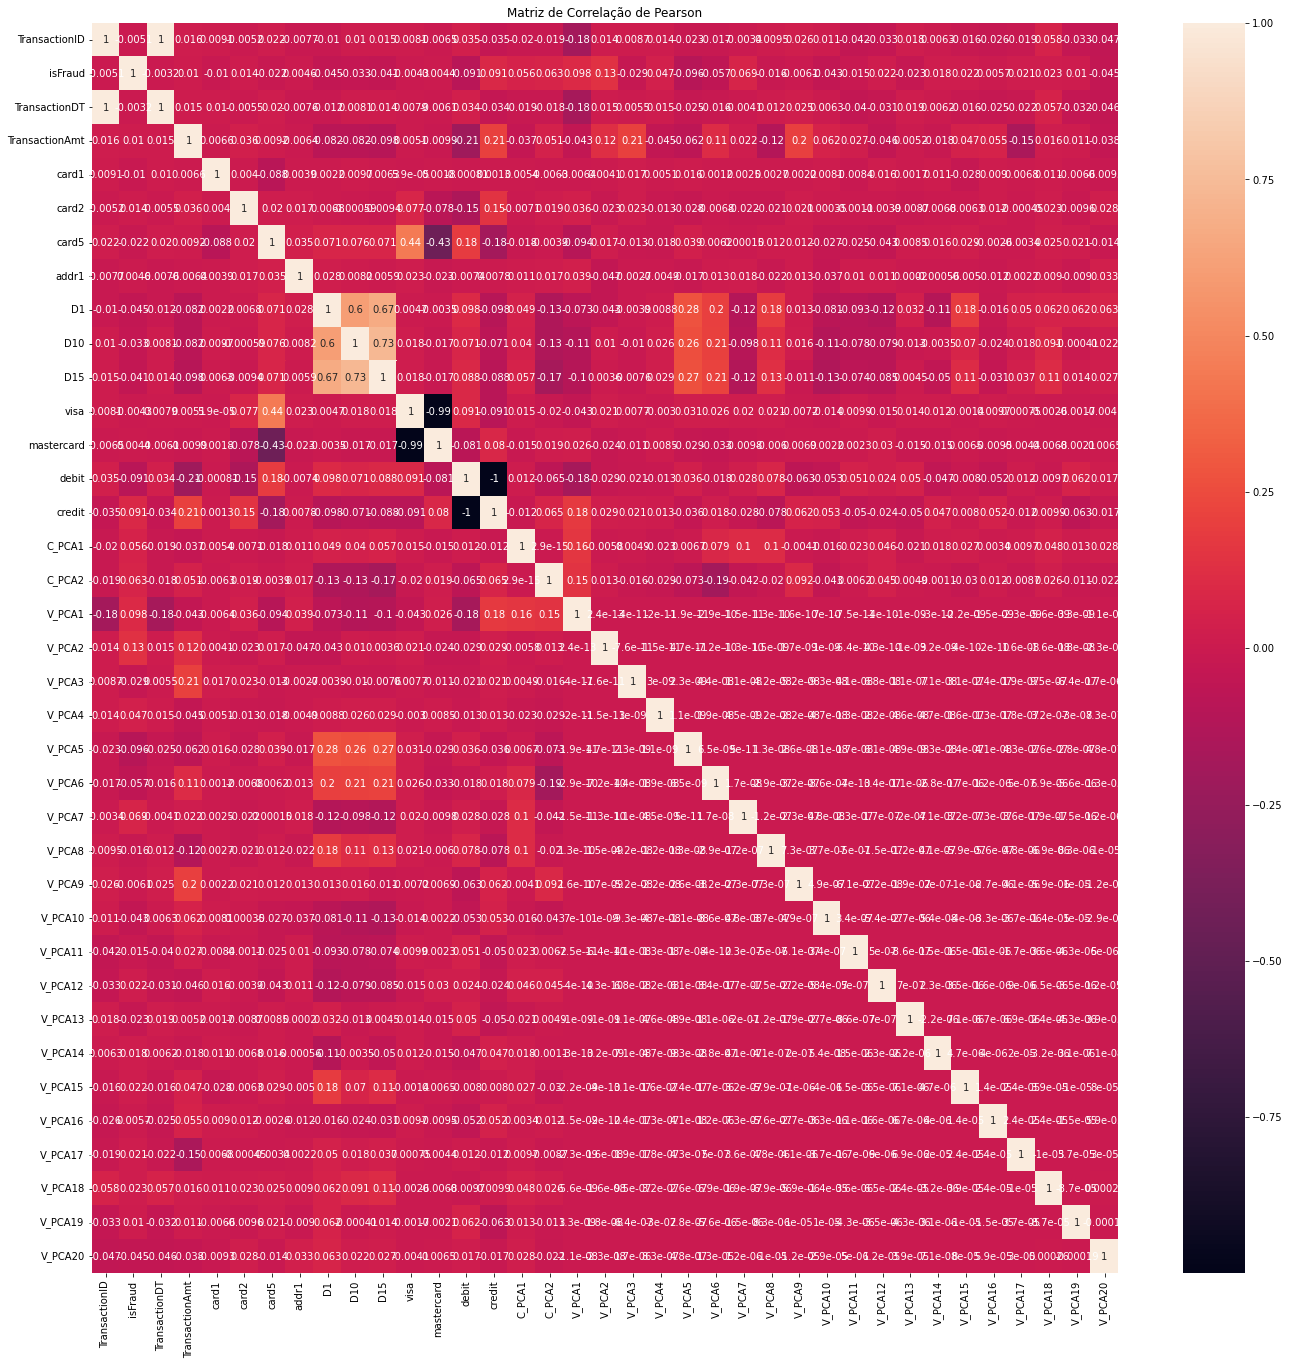

In [ ]:
correlation_matrix = Train_sample.corr()
correlation_matrix

plt.figure(figsize=(23.0,23.0))
plt.title('Matriz de Correlação de Pearson')
sns.heatmap(correlation_matrix, annot=True)

* A análise inicial sugere que a variável de destino está mais correlacionada com o conjunto de colunas _D_, tipo de cartão (débito ou crédito) e alguns componentes principais das colunas _C_ e _V_
* Da mesma forma, pode-se observar que existem certas colunas que parecem não estar relacionadas à variável de destino e pode ser útil extraí-las do banco de dados.
* A matriz de correlação será observada apenas para as 15 primeiras das colunas mais correlacionadas.

In [ ]:
corrmat = Train_sample.corr()
cols_corrmat = corrmat['isFraud'].abs()
cols_corrmat = cols_corrmat.sort_values(ascending=False)
cols_corrmat.head(39)

isFraud           1.000000
V_PCA2            0.134563
V_PCA1            0.097502
V_PCA5            0.096412
credit            0.091037
debit             0.090955
V_PCA7            0.069467
C_PCA2            0.062984
V_PCA6            0.056674
C_PCA1            0.055852
V_PCA4            0.046528
V_PCA20           0.045038
D1                0.044611
V_PCA10           0.043483
D15               0.040932
D10               0.032534
V_PCA3            0.029306
V_PCA13           0.023306
V_PCA18           0.022574
V_PCA15           0.022456
card5             0.021913
V_PCA12           0.021805
V_PCA17           0.021254
V_PCA14           0.018271
V_PCA8            0.015821
V_PCA11           0.014583
card2             0.013715
TransactionAmt    0.010374
card1             0.010114
V_PCA19           0.010048
V_PCA9            0.006101
V_PCA16           0.005685
TransactionID     0.005075
addr1             0.004591
mastercard        0.004396
visa              0.004318
TransactionDT     0.003229
N

* A partir da coluna 13, o coeficiente de correlação com Is Fraud cai abaixo de 3%, direta ou inversamente.
* Essas primeiras 13 colunas serão tomadas para o processo de modelagem

In [ ]:
#Salvando as colunas finais no array para o processo de modelagem
cols = cols_corrmat.index
cols = cols[0:14]
cols
df_model = Train_new2[cols]
df_model.shape

(92296, 14)

Agora salvarei o original, a amostra e o banco de dados a serem usados ​​no processo de modelagem em arquivos CSV individuais.

In [ ]:
Train_new2.to_csv('Train_new2.csv',index=False)
Train_sample.to_csv('Train_sample.csv',index=False)
df_model.to_csv('df_model.csv',index=False)